In [10]:
import pandas as pd
import numpy as np

In [ ]:
# Playing around with kmeans on demographic data

In [11]:
# Load all indices
education = pd.read_csv('../data/Indices/education_attainment_index.csv')
gdp = pd.read_csv('../data/Indices/gdp_region_index.csv')
industries = pd.read_csv('../data/Indices/industries_indexes.csv')
population_density = pd.read_csv('../data/Indices/population_density_index.csv')
regional = pd.read_csv('../data/Indices/regional_indexes.csv')
tax = pd.read_csv('../data/Indices/tax_revenue_index.csv')
working_age = pd.read_csv('../data/Indices/working_age_population_index.csv')

In [12]:
# Column numbers for relative and absolute values
education_rel = [0,6,7,8,9,10,11]
education_abs = [0,3,4,5]
gdp_rel = [0,4,6]
gdp_abs= [0,3,5]
population_density_rel = [0,4]
population_density_abs = [0,3]
tax_rel = [0,4]
tax_abs = [0,3]
working_age_rel = [0,4]
working_age_abs = [0,3]

In [13]:
# Data with inbdustry types: industries, regional
# Data with general info: education, gdp, population_density, tax, working_age

# Merge general indices into one frame with relative values
general = pd.merge(education[education.columns[education_rel]], gdp[gdp.columns[gdp_rel]], on='Region code')
general = pd.merge(general, population_density[population_density.columns[population_density_rel]], on='Region code')
general = pd.merge(general, tax[tax.columns[tax_rel]], on='Region code')
general = pd.merge(general, working_age[working_age.columns[working_age_rel]], on='Region code')

In [14]:
general

,Region code,Bachelor's Relative Growth 2018-2022 (%),Master's Relative Growth 2018-2022 (%),Doctoral Relative Growth 2018-2022 (%),Bachelor's Ratio Growth 2018-2022 (%),Master's Ratio Growth 2018-2022 (%),Doctoral Ratio Growth 2018-2022 (%),GDP Relative Growth 2016-2020 (%),GPD per capita Relative Growth 2016-2020 (%),Population Density Relative Growth 2017-2021 (%),Tax Revenue Relative Growth 2017-2021 (%),Working-age population Relative Growth 2017-2021 (%)
0,MK01,10.493309,13.203495,8.707437,0.764054,1.310748,0.066344,10.876946,6.502208,3.570678,26.574647,2.759934
1,MK02,12.551122,15.246932,8.656483,1.190035,1.256545,0.083060,11.266386,10.006575,1.214210,20.084951,-0.170638
2,MK04,8.620785,9.187482,2.226027,1.098859,0.670239,0.012372,2.870677,5.853243,-2.775434,31.518400,-5.174690
3,MK05,12.445950,11.108813,8.244681,1.267809,0.782516,0.044068,8.538917,10.760536,-1.451482,128.398496,-3.628145
4,MK06,15.976378,17.468233,11.858905,1.512489,1.479550,0.089333,14.031853,11.556608,2.555737,38.657598,2.026397
5,MK07,9.866862,13.021022,11.001410,1.068253,0.887930,0.047877,2.453207,3.699792,-1.405445,33.632813,-3.953090
6,MK08,9.444153,7.609369,5.865103,1.268230,0.648884,0.022651,14.513342,19.859920,-4.327439,2.731535,-6.974955
7,MK09,9.298146,9.415027,10.756972,1.171272,0.848209,0.094837,-0.121614,2.617337,-2.893774,128.926517,-5.287141
8,MK10,7.099726,8.701979,7.157895,1.020125,0.748246,0.044601,2.804781,8.590764,-5.138955,26.447165,-9.539200
9,MK11,12.109303,14.581596,8.532934,1.355886,1.092621,0.087226,9.519889,11.454945,-1.274794,51.287894,-4.076556


In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

data = general[general.columns[1:]]

# Find optimal number of clusters
scores = []
labelss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i).fit(data)
    labels = kmeans.labels_
    labelss.append(labels)
    scores += [silhouette_score(data, labels, metric='euclidean')]
    print("Number of clusters: ", i)
    print("Silhouette score: ", silhouette_score(data, labels, metric='euclidean'))
    print("")

Number of clusters:  2
Silhouette score:  0.6591826639475521

Number of clusters:  3
Silhouette score:  0.50061588794647

Number of clusters:  4
Silhouette score:  0.4110714459858369

Number of clusters:  5
Silhouette score:  0.3861861344532057

Number of clusters:  6
Silhouette score:  0.3950366368137406

Number of clusters:  7
Silhouette score:  0.3526205050340172

Number of clusters:  8
Silhouette score:  0.31629978203084935

Number of clusters:  9
Silhouette score:  0.2807300440512218



/home/egor/micromamba/envs/ds_project/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/egor/micromamba/envs/ds_project/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/egor/micromamba/envs/ds_project/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/egor/micromamba/envs/ds_project/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: Fut

In [16]:
clust_2 = labelss[0]
clust_3 = labelss[1]

In [17]:
data = PCA(n_components=2).fit_transform(data)
data = pd.DataFrame(data)
data['Region'] = general['Region code']

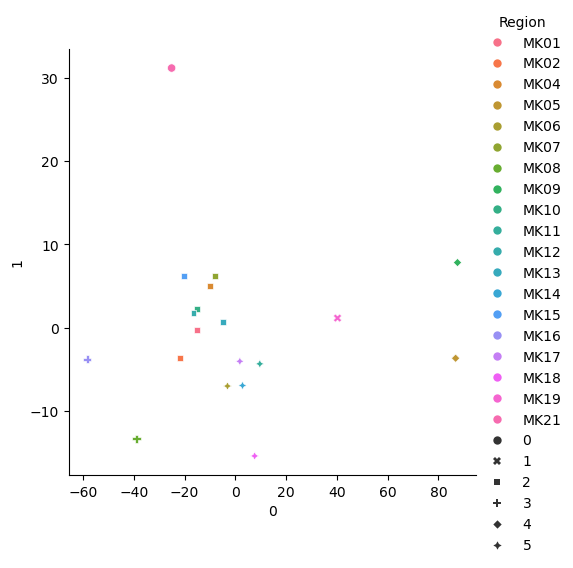

In [18]:
sns.relplot(x=0, y=1, hue='Region', style=labelss[4], data=data)

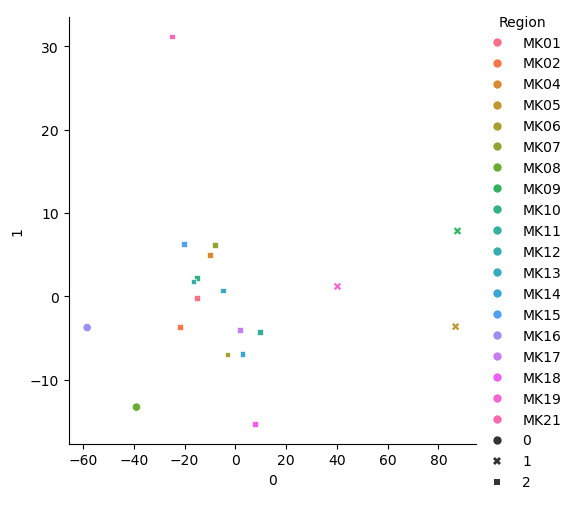

In [46]:

sns.relplot(x=0, y=1, hue='Region', style=clust_3, data=data)

In [49]:
general['Name'] = gdp['Region name (en)']

In [53]:
general.iloc[clust_2 == 0, :]

,Region code,Bachelor's Relative Growth 2018-2022 (%),Master's Relative Growth 2018-2022 (%),Doctoral Relative Growth 2018-2022 (%),Bachelor's Ratio Growth 2018-2022 (%),Master's Ratio Growth 2018-2022 (%),Doctoral Ratio Growth 2018-2022 (%),GDP Relative Growth 2016-2020 (%),GPD per capita Relative Growth 2016-2020 (%),Population Density Relative Growth 2017-2021 (%),Tax Revenue Relative Growth 2017-2021 (%),Working-age population Relative Growth 2017-2021 (%),Name
3,MK05,12.445950,11.108813,8.244681,1.267809,0.782516,0.044068,8.538917,10.760536,-1.451482,128.398496,-3.628145,Kanta-Häme
7,MK09,9.298146,9.415027,10.756972,1.171272,0.848209,0.094837,-0.121614,2.617337,-2.893774,128.926517,-5.287141,South Karelia
17,MK19,13.059119,14.176766,6.416275,1.436435,1.013798,0.030341,5.297206,7.451801,-1.522684,81.846026,-5.102878,Lapland


In [56]:
general.iloc[clust_3 == 2, :]

,Region code,Bachelor's Relative Growth 2018-2022 (%),Master's Relative Growth 2018-2022 (%),Doctoral Relative Growth 2018-2022 (%),Bachelor's Ratio Growth 2018-2022 (%),Master's Ratio Growth 2018-2022 (%),Doctoral Ratio Growth 2018-2022 (%),GDP Relative Growth 2016-2020 (%),GPD per capita Relative Growth 2016-2020 (%),Population Density Relative Growth 2017-2021 (%),Tax Revenue Relative Growth 2017-2021 (%),Working-age population Relative Growth 2017-2021 (%),Name
0,MK01,10.493309,13.203495,8.707437,0.764054,1.310748,0.066344,10.876946,6.502208,3.570678,26.574647,2.759934,Uusimaa
1,MK02,12.551122,15.246932,8.656483,1.190035,1.256545,0.083060,11.266386,10.006575,1.214210,20.084951,-0.170638,Southwest Finland
2,MK04,8.620785,9.187482,2.226027,1.098859,0.670239,0.012372,2.870677,5.853243,-2.775434,31.518400,-5.174690,Satakunta
4,MK06,15.976378,17.468233,11.858905,1.512489,1.479550,0.089333,14.031853,11.556608,2.555737,38.657598,2.026397,Pirkanmaa
5,MK07,9.866862,13.021022,11.001410,1.068253,0.887930,0.047877,2.453207,3.699792,-1.405445,33.632813,-3.953090,Päijät-Häme
8,MK10,7.099726,8.701979,7.157895,1.020125,0.748246,0.044601,2.804781,8.590764,-5.138955,26.447165,-9.539200,South Savo
9,MK11,12.109303,14.581596,8.532934,1.355886,1.092621,0.087226,9.519889,11.454945,-1.274794,51.287894,-4.076556,North Savo
10,MK12,9.120640,13.548107,5.862362,1.073848,1.051024,0.060702,5.170149,7.711532,-1.898571,25.134331,-5.129522,North Karelia
11,MK13,10.909610,13.679840,8.970233,1.167762,1.170401,0.094083,7.062381,7.423498,-0.400323,36.927120,-2.088135,Central Finland
12,MK14,12.008762,12.585156,8.943089,1.375192,0.775665,0.024628,11.101485,13.576891,-1.953646,44.464144,-4.637802,South Ostrobothnia
